In [1]:
import psycopg2
import requests
import json
import time
from psycopg2.extras import Json
import pandas as pd
import numpy as np

In [2]:
conn = psycopg2.connect("dbname=postgres user=postgres host=localhost port=5432 password=123456")

In [3]:
cur = conn.cursor()
cur.execute("select id, name, salary_from, salary_to, area, schedule from analyst_2;")
vacs = cur.fetchall()

In [4]:
an2 = pd.DataFrame(vacs)

In [5]:
an2.head()

,0,1,2,3,4,5
0,106692739,Бизнес-аналитик (стажер),60000.0,70000.0,Казань,remote
1,106797840,Аналитик отчетности и планирования,NaN,NaN,Самара,remote
2,106781430,Аналитик данных (команда Retail),NaN,NaN,Москва,remote
3,104461044,Младший аналитик данных,10000.0,45000.0,Назрань,remote
4,106469611,Младший аналитик,NaN,75000.0,Москва,remote


In [6]:
# Rename columns
an2.rename(columns={0: 'id', 1: 'vacancy', 2: 's_from', 3: 's_to', 4:'area', 5:'schedule'}, inplace=True)
an2

,id,vacancy,s_from,s_to,area,schedule
0,106692739,Бизнес-аналитик (стажер),60000.0,70000.0,Казань,remote
1,106797840,Аналитик отчетности и планирования,NaN,NaN,Самара,remote
2,106781430,Аналитик данных (команда Retail),NaN,NaN,Москва,remote
3,104461044,Младший аналитик данных,10000.0,45000.0,Назрань,remote
4,106469611,Младший аналитик,NaN,75000.0,Москва,remote
...,...,...,...,...,...,...
1061,106274183,Системный аналитик (1С),NaN,NaN,Москва,remote
1062,105803837,"Аналитик 1С (ERP, УТ) в IT-компании",NaN,NaN,Казань,remote
1063,104906884,"Ведущий консультант-аналитик 1С: ERP (закупки,...",NaN,NaN,Москва,remote
1064,104428810,Аналитик 1С:ERP регламентированный учет + казн...,NaN,NaN,Самара,remote


In [7]:
an2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1066 non-null   int64  
 1   vacancy   1066 non-null   object 
 2   s_from    382 non-null    float64
 3   s_to      320 non-null    float64
 4   area      1066 non-null   object 
 5   schedule  1066 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 50.1+ KB


In [8]:
an2.describe()

,id,s_from,s_to
count,1.066000e+03,382.000000,320.000000
mean,1.049664e+08,124899.083770,184347.271875
std,3.994685e+06,74770.292537,112905.475860
min,5.241019e+07,300.000000,500.000000
25%,1.053856e+08,70000.000000,100000.000000
50%,1.061916e+08,110000.000000,175000.000000
75%,1.067359e+08,180000.000000,250000.000000
max,1.069025e+08,390000.000000,700000.000000


In [9]:
an2.area.unique()

array(['Казань', 'Самара', 'Москва', 'Назрань', 'Пермь',
       'Санкт-Петербург', 'Ростов-на-Дону', 'Ижевск', 'Новосибирск',
       'Эстония', 'Выкса', 'Челябинск', 'Красноярск', 'Ярославль',
       'Иркутск', 'Сербия', 'Екатеринбург', 'Томск', 'Краснодар', 'Кипр',
       'Владимир', 'Ташкент', 'Калининград', 'Кемерово',
       'Нижний Новгород', 'Иннополис', 'Армения', 'Волгоград',
       'Хабаровск', 'Уфа', 'Липецк', 'Воронеж', 'Элиста', 'Рязань',
       'Волжский (Волгоградская область)', 'Набережные Челны',
       'Севастополь', 'Чебоксары', 'Тбилиси',
       'Артемовский (Свердловская область)', 'Белгород', 'Тольятти',
       'Алматы', 'Грозный', 'Саранск', 'Барнаул', 'Караганда', 'ОАЭ',
       'Иваново (Ивановская область)', 'Гомель', 'Польша', 'Петрозаводск',
       'США', 'Новокузнецк', 'Баку', 'Минск', 'Тула', 'Брянск', 'Астана',
       'Йошкар-Ола', 'Симферополь', 'Сочи', 'Ульяновск', 'Оренбург',
       'Химки (Московская область)', 'Саратов', 'Пенза', 'Тюмень',
       'Вели

<Axes: >

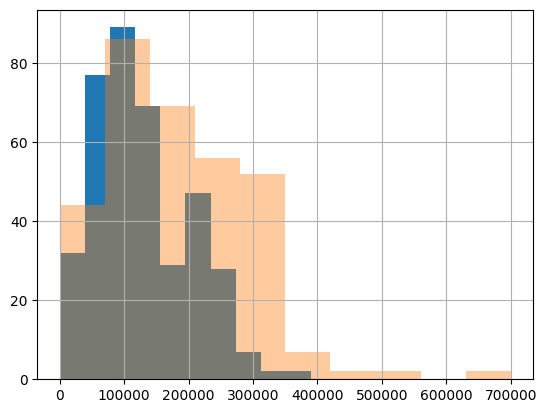

In [10]:
an2.s_from.hist()
an2.s_to.hist(alpha=0.4)

<Axes: >

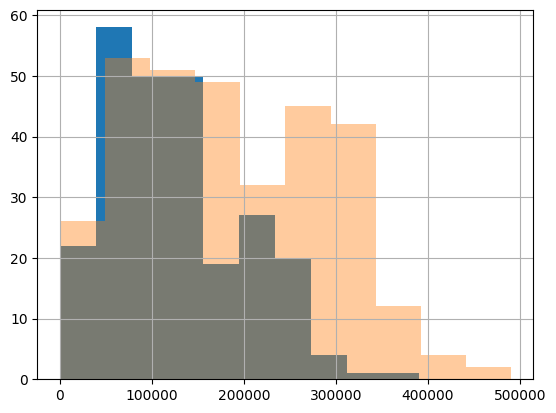

In [11]:
df_s = an2.s_to < 500000

an2[df_s].s_from.hist()
an2[df_s].s_to.hist(alpha=0.4)

In [17]:
import scipy
import scipy.stats as stats
stats.shapiro(an2.s_from)

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [18]:
# коэффициенты ассимметрии и эксцесса
skew = an2.s_from.skew()
kurt = an2.s_from.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)

Коэффициент ассиметрии: 0.6290981825885746
Коэффициент эксцесса: -0.00381946225845331


Коэффициент асимметрии (или скоса) показывает, насколько распределение данных отклоняется от симметричного. В вашем случае коэффициент асимметрии равен 0.629, что указывает на умеренно положительную асимметрию. Это значит, что в данных больше значений с длинным правым хвостом (положительный скошенность).

Коэффициент эксцесса, равный -0.0038, близок к нулю, что говорит о том, что распределение данных имеет почти нормальный уровень "остроты" (или "плоскости"). В нормальном распределении коэффициент эксцесса равен нулю, так что отклонение незначительное.

Таким образом, ваши данные могут быть описаны как слегка асимметричные с почти нормальной крутизной распределения.

In [19]:
stats.shapiro(an2.s_to)

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [20]:
# коэффициенты ассимметрии и эксцесса
skew = an2.s_to.skew()
kurt = an2.s_to.kurt()
print('Коэффициент ассиметрии:', skew)
print('Коэффициент эксцесса:', kurt)

Коэффициент ассиметрии: 0.8574759338230298
Коэффициент эксцесса: 1.8367818525574755


Коэффициент асимметрии, равный 0.857, указывает на более выраженную положительную асимметрию. Это значит, что в вашем распределении больше значений с длинным правым хвостом, и распределение более смещено вправо по сравнению с предыдущими данными.

Коэффициент эксцесса, равный 1.837, значительно больше нуля. Это означает, что распределение является более "острым" или пикообразным по сравнению с нормальным распределением, где эксцесс равен 0. Ваши данные демонстрируют повышенную концентрацию значений около среднего и более тяжелые хвосты.